# Introducción al Aprendizaje por Refuerzos
## Nicolás Salusso - 10710

### 1) Desarrollo sobre *Gridworld* 

#### 1.1  Se genera la gráfica en donde se muestra la evolución del cálculo *np.sum(np.abs(world - newWorld))* para cada paso de actualización realizado hasta lograr la convergencia frente a la política óptima.

In [1]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

#Iteración de Valor
actualizaciones = 0
evolucion = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            for action in actions:
                newPosition = nextState[i][j][action]
                # Actualización basada en Bellman
                newWorld[i, j] += actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    actualizaciones += 1
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Aleatoria')
        print(newWorld)
        break
    world = newWorld

Política Aleatoria
[[ 3.30902999  8.78932551  4.42765281  5.3224012   1.49221235]
 [ 1.52162172  2.9923515   2.25017358  1.90760531  0.5474363 ]
 [ 0.05085614  0.73820423  0.67314689  0.35821982 -0.40310755]
 [-0.97355865 -0.43546179 -0.35484864 -0.58557148 -1.18304148]
 [-1.8576669  -1.34519762 -1.22923364 -1.42288454 -1.97514545]]


##### Gráfica

Se logra la convergencia en la iteración k=76


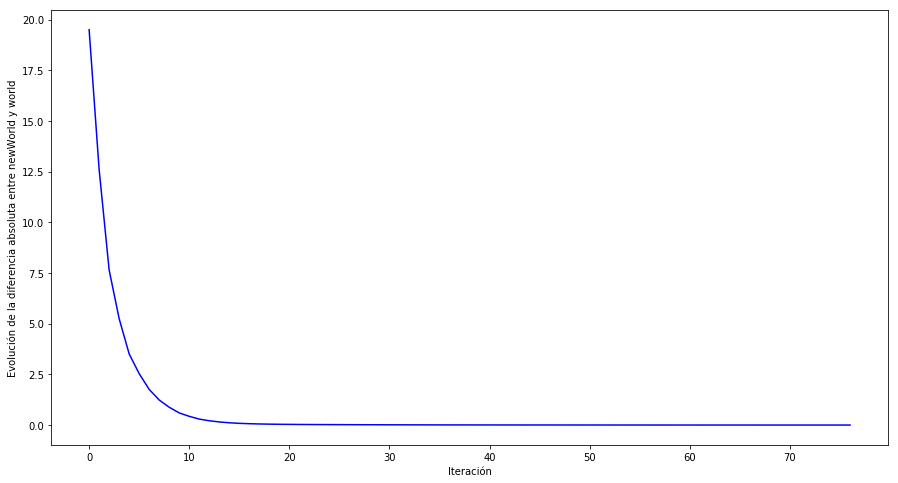

In [2]:
import matplotlib.pyplot as plt
print('Se logra la convergencia en la iteración k={}'.format(np.argmin(evolucion)))
plt.figure(figsize=(15, 8))
plt.plot(range(0, actualizaciones), evolucion, 'b-')
plt.xlabel('Iteración')
plt.ylabel('Evolución de la diferencia absoluta entre newWorld y world')
plt.show()

#### 1.2  Se modifica el algoritmo anterior para encontrar el valor de la política óptima.

In [3]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

#Iteración de Valor  
actualizaciones = 0
evolucion = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    pi = []
    for i in range(0, WORLD_SIZE):
        pi.append([])
        for j in range(0, WORLD_SIZE):
            pi[i].append([])
            max_v = -3000
            for action in actions:
                newPosition = nextState[i][j][action]
                # Actualización basada en Bellman 
                v = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if v >= max_v:
                    max_v = v
            for action in actions:
                newPosition = nextState[i][j][action]
                v = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if v == max_v:
                    pi[i][j].append(action)
                    newWorld[i, j] = v
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    actualizaciones += 1
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Óptima')
        print(np.array(pi))
        print('Valor de la política óptima: {}'.format(np.sum(newWorld)))
        break
    world = newWorld

Política Óptima
[[list(['R']) list(['L', 'U', 'R', 'D']) list(['L'])
  list(['L', 'U', 'R', 'D']) list(['L'])]
 [list(['U', 'R']) list(['U']) list(['L', 'U']) list(['L']) list(['L'])]
 [list(['U', 'R']) list(['U']) list(['L', 'U']) list(['L', 'U'])
  list(['L', 'U'])]
 [list(['U', 'R']) list(['U']) list(['L', 'U']) list(['L', 'U'])
  list(['L', 'U'])]
 [list(['U', 'R']) list(['U']) list(['L', 'U']) list(['L', 'U'])
  list(['L', 'U'])]]
Valor de la política óptima: 433.21433737929783


##### Gráfica que muestra la evolución del cálculo *np.sum(np.abs(world - newWorld))*, para cada paso de iteración *k* realizada hasta lograr la convergencia.

Se logra la convergencia en la iteración k=123


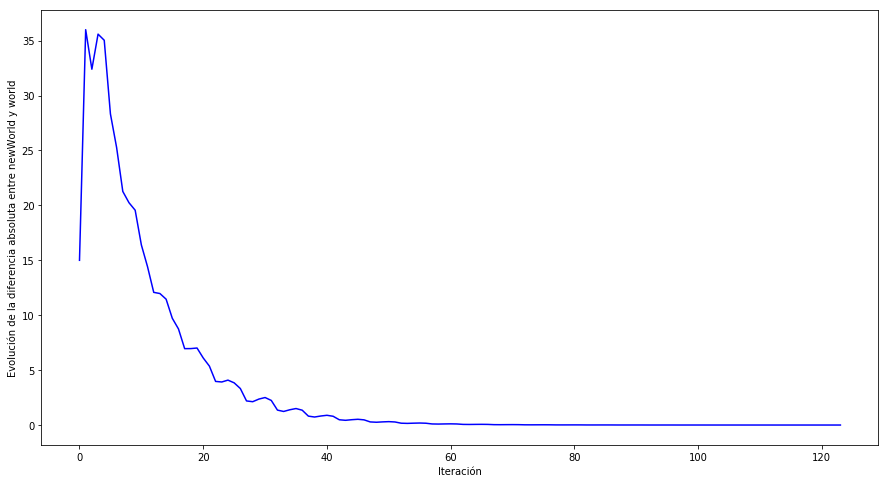

In [4]:
import matplotlib.pyplot as plt
print('Se logra la convergencia en la iteración k={}'.format(np.argmin(evolucion)))
plt.figure(figsize=(15, 8))
plt.plot(range(0, actualizaciones), evolucion, 'b-')
plt.xlabel('Iteración')
plt.ylabel('Evolución de la diferencia absoluta entre newWorld y world')
plt.show()

### 2) Desarrollo sobre el robot recolector de basura.

#### 2.1 Algoritmo de *Iteración de Valor* para obtener la política óptima del robot de reciclaje.

In [5]:
from __future__ import print_function
import numpy as np
import random

# Estados, decuento y valores especiales
WORLD_SIZE = 2
discount = 0.9
alfa = 0.9
beta = 0.1
r_search = 5 
r_wait = 2

world = np.zeros(WORLD_SIZE)

actions = ['SEARCH', 'WAIT', 'RECHARGE']

# se setea la función de transición y la función de reward
actionReward = []
for i in range(0, WORLD_SIZE):
    actionReward.append([])
actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
actionReward[1].append(dict({'SEARCH': -3, 'WAIT': r_wait, 'RECHARGE': 0})) 
actionReward[1].append(dict({'SEARCH': r_search, 'WAIT': r_wait, 'RECHARGE': 0}))


def next_state(s, action):
    nextState = 0
    if s == 0 and action == 'SEARCH':
        sorteo = random.random()
        if sorteo <= alfa:
            nextState = 0
        else:
            nextState = 1
    
    if s == 0 and action == 'WAIT':
        nextState = 0
        
    if s == 1 and action == 'SEARCH':
        sorteo = random.random()
        if sorteo <= beta:
            nextState = 1
        else:
            nextState = 0
        
    if s == 1 and action == 'WAIT':
        nextState = 1
        
    if s == 1 and action == 'RECHARGE':
        nextState = 0
    
    return nextState, actionReward[i][nextState][action]

#Iteración de Valor
actualizaciones = 0
evolucion = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros(WORLD_SIZE)
    pi = []
    vector_newPosition = []
    vector_reward = []
    for i in range(0, WORLD_SIZE):
        pi.append([])
        max_v = -3000
        for action in actions:
            vector_newPosition.append([])
            vector_reward.append([])
            if i == 1 or (i == 0 and action != 'RECHARGE'):
                newPosition, reward = next_state(i, action)
                vector_newPosition[actions.index(action)] = newPosition
                vector_reward[actions.index(action)] = reward                
                v = reward + discount * world[newPosition]
                if v >= max_v:
                    max_v = v
        for action in actions:
            if i == 1 or (i == 0 and action != 'RECHARGE'):
                v = vector_reward[actions.index(action)] + discount * world[vector_newPosition[actions.index(action)]]
                if v == max_v:
                    pi[i].append(action)
                    newWorld[i] = v
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    actualizaciones += 1
    # if actualizaciones == 50000:
    #     break
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Óptima')
        print(pi)
        print('')
        print('Valor de la política óptima: {}'.format(np.sum(newWorld)))
        break
    world = newWorld

Política Óptima
[['SEARCH'], ['RECHARGE']]

Valor de la política óptima: 94.99917986381124


Se logra la convergencia en la iteración k=126009


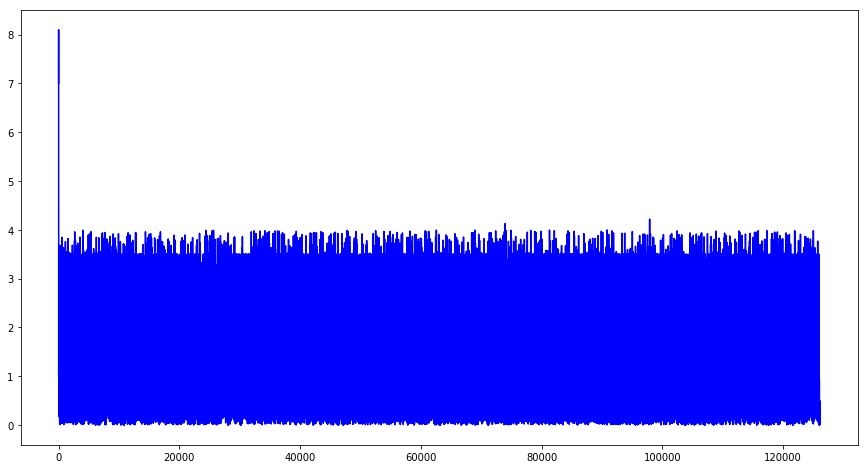

In [6]:
import matplotlib.pyplot as plt
print('Se logra la convergencia en la iteración k={}'.format(np.argmin(evolucion)))
plt.figure(figsize=(15, 8))
plt.plot(range(0, actualizaciones), evolucion, 'b-')
plt.show()

#### 2.2 Evaluación de como cambia el valor de la política óptima a partir de alterar $\alpha$ y $\beta$  para un valor de  $R_{search}=5 $ y $R_{wait} = 2$ .

In [7]:
import numpy as np
alfas = np.linspace(0.01, 0.99, 10)
print('Alfas: {}'.format(alfas))
betas = np.linspace(0.01, 0.99, 10)
print('Betas: {}'.format(betas))

Alfas: [ 0.01        0.11888889  0.22777778  0.33666667  0.44555556  0.55444444
  0.66333333  0.77222222  0.88111111  0.99      ]
Betas: [ 0.01        0.11888889  0.22777778  0.33666667  0.44555556  0.55444444
  0.66333333  0.77222222  0.88111111  0.99      ]


En pruebas con valores de alfa y beta arbitrarios se dieron casos en donde se demoraba mucho tiempo en lograr la convergencia, es por ello que se determinó un máximo de 200.000 iteraciones. Una vez alacanzado ese valor de iteración el valor de la política se lo setea en cero(0), lo cual no se significa que ese sea el valor real para esos valores de alfa y beta, sino que se lo utiliza a modo de representación de la situación planteada.

In [8]:
from __future__ import print_function
import numpy as np
import random

# Estados, decuento y valores especiales
WORLD_SIZE = 2
discount = 0.9

# REWARDS
r_search = 5 
r_wait = 2

world = np.zeros(WORLD_SIZE)

actions = ['SEARCH', 'WAIT', 'RECHARGE']

# se setea la función de transición y la función de reward
actionReward = []
for i in range(0, WORLD_SIZE):
    actionReward.append([])
actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
actionReward[1].append(dict({'SEARCH': -3, 'WAIT': r_wait, 'RECHARGE': 0})) 
actionReward[1].append(dict({'SEARCH': r_search, 'WAIT': r_wait, 'RECHARGE': 0}))


def next_state(s, action):
    nextState = 0
    if s == 0 and action == 'SEARCH':
        sorteo = random.random()
        if sorteo <= alfa:
            nextState = 0
        else:
            nextState = 1
    
    if s == 0 and action == 'WAIT':
        nextState = 0
        
    if s == 1 and action == 'SEARCH':
        sorteo = random.random()
        if sorteo <= beta:
            nextState = 1
        else:
            nextState = 0
        
    if s == 1 and action == 'WAIT':
        nextState = 1
        
    if s == 1 and action == 'RECHARGE':
        nextState = 0
    
    return nextState, actionReward[s][nextState][action]

alfas_grafica = []
betas_grafica = []
valores_pi_grafica = []
# Iteraciones para los valores de alfa y beta.
for alfa in alfas:
    for beta in betas:
        alfas_grafica.append(alfa)
        betas_grafica.append(beta)
        world = np.zeros(WORLD_SIZE)
        actualizaciones = 0
        while True:
            # Se itera hasta lograr la convergencia
            newWorld = np.zeros(WORLD_SIZE)
            pi = []
            vector_newState = []
            vector_reward = []
            for s in range(0, WORLD_SIZE):
                pi.append([])
                max_v = -3000
                for action in actions:
                    vector_newState.append([])
                    vector_reward.append([])
                    # No se calcula el V(s) para el estado HIGH si ejecuta la accion RECHARGE,
                    # ya que no es posible en el grafo planteado.
                    if s == 1 or (s == 0 and action != 'RECHARGE'):
                        newState, reward = next_state(s, action)
                        
                        # Al ser estocástico el método por el cual determinamos el estado siguiente,
                        # Es necesario guardar el resultado de la función next_state para la siguiente
                        # iteración de acciones.
                        vector_newState[actions.index(action)] = newState
                        vector_reward[actions.index(action)] = reward  
                        
                        v = reward + discount * world[newState]
                        if v >= max_v:
                            max_v = v
                for action in actions:
                    if s == 1 or (s == 0 and action != 'RECHARGE'):
                        v = vector_reward[actions.index(action)] + discount * world[vector_newState[actions.index(action)]]
                        if v == max_v:
                            pi[s].append(action)
                            newWorld[s] = v
            actualizaciones += 1
            if actualizaciones == 200000:
                valores_pi_grafica.append(0)
                break
            if np.sum(np.abs(world - newWorld)) < 1e-3:
                valores_pi_grafica.append(np.sum(newWorld))
                break
            world = newWorld
print('FIN')

FIN


##### Gráfica que describe como varían la totalidad de los valores de los estados en función a los valores de $\alpha$ y $\beta$ .

El retorno máximo esperado total para todos los estados es de 99.99176003495798 y se obtiene con alfa=0.99 y beta=0.99


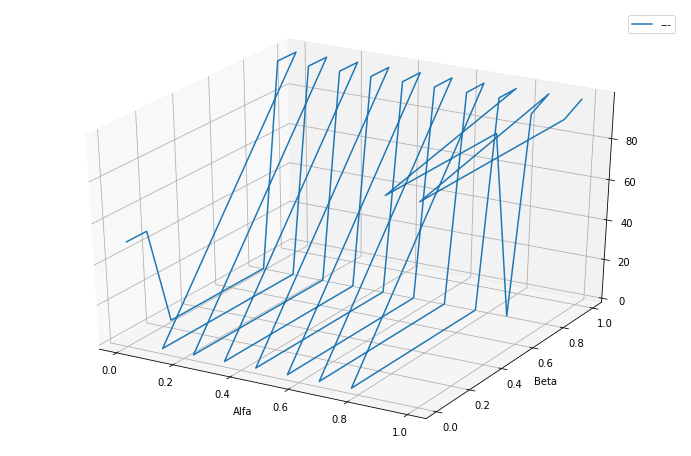

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

max_val = max(valores_pi_grafica)
arg_max = np.argmax(valores_pi_grafica)
beta_max = betas_grafica[arg_max]
alfa_max = alfas_grafica[arg_max]
print('El retorno máximo esperado total para todos los estados es de {} y se obtiene con alfa={} y beta={}'.format(
    max_val, beta_max, alfa_max))

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
z = valores_pi_grafica
x = alfas_grafica
y = betas_grafica
ax.plot(x, y, z, label='---')
ax.legend()
plt.xlabel('Alfa')
plt.ylabel('Beta')
plt.show()

#### 2.3 Con los mejores valores de $\alpha$ y $\beta$ obtenidos en 2.2, se realiza la misma operación variando $R_{search} $  con un tope de 10, manteniendo $R_{wait}$ = en 4.

In [10]:
import numpy as np
r_searchs = np.linspace(5, 10, 5)
print(r_searchs)

[  5.     6.25   7.5    8.75  10.  ]


In [11]:
from __future__ import print_function
import numpy as np
import random

# Estados, decuento y valores especiales
WORLD_SIZE = 2
discount = 0.9
alfa = alfa_max
beta = beta_max
r_wait = 4

actions = ['SEARCH', 'WAIT', 'RECHARGE']


valores_pi_grafica = []
# Se itera para los valores de r_search definidos anteriormente
for r_search in r_searchs:
    world = np.zeros(WORLD_SIZE)
    
    # se setea la función de transición y la función de reward
    actionReward = []
    for i in range(0, WORLD_SIZE):
        actionReward.append([])
    actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
    actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
    actionReward[1].append(dict({'SEARCH': -3, 'WAIT': r_wait, 'RECHARGE': 0})) 
    actionReward[1].append(dict({'SEARCH': r_search, 'WAIT': r_wait, 'RECHARGE': 0}))
    
    
    def next_state(s, action):
        nextState = 0
        if s == 0 and action == 'SEARCH':
            sorteo = random.random()
            if sorteo <= alfa:
                nextState = 0
            else:
                nextState = 1
        
        if s == 0 and action == 'WAIT':
            nextState = 0
            
        if s == 1 and action == 'SEARCH':
            sorteo = random.random()
            if sorteo <= beta:
                nextState = 1
            else:
                nextState = 0
            
        if s == 1 and action == 'WAIT':
            nextState = 1
            
        if s == 1 and action == 'RECHARGE':
            nextState = 0
        
        return nextState, actionReward[s][nextState][action]
    
    #Iteración de Valor
    actualizaciones = 0
    evolucion = []
    while True:
        # Se itera hasta lograr la convergencia
        newWorld = np.zeros(WORLD_SIZE)
        pi = []
        vector_newState = []
        vector_reward = []
        for s in range(0, WORLD_SIZE):
            pi.append([])
            max_v = -3000
            for action in actions:
                vector_newState.append([])
                vector_reward.append([])
                
                # No se calcula el V(s) para el estado HIGH si ejecuta la accion RECHARGE,
                # ya que no es posible en el grafo planteado.
                if s == 1 or (s == 0 and action != 'RECHARGE'):
                    
                    newState, reward = next_state(s, action)
                    
                    # Al ser estocástico el método por el cual determinamos el estado siguiente,
                    # Es necesario guardar el resultado de la función next_state para la siguiente
                    # iteración de acciones.
                    vector_newState[actions.index(action)] = newState
                    vector_reward[actions.index(action)] = reward
                    
                    v = reward + discount * world[newState]
                    if v >= max_v:
                        max_v = v
            for action in actions:
                if s == 1 or (s == 0 and action != 'RECHARGE'):
                    v = vector_reward[actions.index(action)] + discount * world[vector_newState[actions.index(action)]]
                    if v == max_v:
                        pi[s].append(action)
                        newWorld[s] = v
        #Datos para la grafica
        evolucion.append(np.sum(np.abs(world - newWorld)))
        actualizaciones += 1
        if np.sum(np.abs(world - newWorld)) < 1e-4:
            print('R_search {}'.format(r_search))
            print('')
            print('Política Óptima:')
            print(pi)
            print('Valor total de los estados')
            print(np.sum(newWorld))
            print('')
            valores_pi_grafica.append(newWorld)
            break
        world = newWorld

R_search 5.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
99.9991816913

R_search 6.25

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
124.999176932

R_search 7.5

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
149.999179687

R_search 8.75

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
174.999180812

R_search 10.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
199.999141128



R_search 5.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
99.9991750402



R_search 6.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
119.999108385



R_search 7.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
139.999128371



R_search 8.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
159.999134046



R_search 9.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
179.99911532



R_search 10.0

Política Óptima:
[['SEARCH'], ['SEARCH']]
Valor total de los estados
199.999108375



##### Gráfica

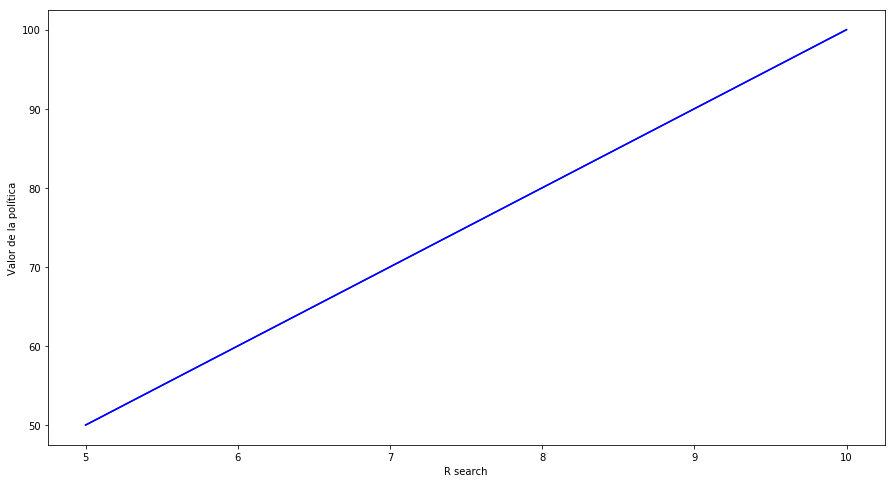

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(r_searchs, valores_pi_grafica, 'b-')
plt.xlabel('R search')
plt.ylabel('Valor de la política')
plt.show()

### 3) Agente que debe aprender a llegar en la menor cantidad de pasos desde la posición *S* a la posición *G*

#### 3.1 Función de recompensa que permite al agente aprender a lograr el objetivo

##### Para reciclar código la función también se devuelve el resultado de la funcioón de transición.

In [13]:
def reward_nexstate():
    nextState = []
    actionReward = []
    for i in range(0, WORLD_SIZE):
        nextState.append([])
        actionReward.append([])
        for j in range(0, WORLD_SIZE):
            next = dict()
            reward = dict()
            if i == 0:
                next['U'] = S_POS
                reward['U'] = -3
            else:
                next['U'] = [i - 1, j]
                reward['U'] = -1
    
            if i == WORLD_SIZE - 1:
                next['D'] = S_POS
                reward['D'] = -3
            else:
                next['D'] = [i + 1, j]
                reward['D'] = -1
    
            if j == 0:
                next['L'] = S_POS
                reward['L'] = -3
            else:
                next['L'] = [i, j - 1]
                reward['L'] = -1
    
            if j == WORLD_SIZE - 1:
                next['R'] = S_POS
                reward['R'] = -3
            else:
                next['R'] = [i, j + 1]
                reward['R'] = -1
                
            if i == 2 and j == 3:
                next['D'] = G_POS
                reward['D'] = 10
                
            if i == 3 and j == 2:
                next['R'] = G_POS
                reward['R'] = 10
    
            nextState[i].append(next)
            actionReward[i].append(reward)
    return actionReward, nextState

#### 3.2 Algoritmo basado en Iteración de Valor para aprender la política óptima en el entorno especificado.

In [23]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
S_POS = [0, 0]
G_POS = [3, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se obtiene la función de transición y la función de reward
actionReward, nextState = reward_nexstate()

#Iteración de Valor  
actualizaciones = 0
evolucion = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    pi = []
    for i in range(0, WORLD_SIZE):
        pi.append([])
        for j in range(0, WORLD_SIZE):
            pi[i].append([])
            max_v = -3000
            for action in actions:
                newPosition = nextState[i][j][action]
                v = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if v >= max_v:
                    max_v = v
            for action in actions:
                newPosition = nextState[i][j][action]
                v = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if v == max_v:
                    pi[i][j].append(action)
                    newWorld[i, j] = v
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    actualizaciones += 1
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Óptima')
        print(np.array(pi))
        break
    world = newWorld

Política Óptima
[[list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R']) list(['R']) list(['R']) list(['L', 'U'])]]
[[ 24.18621462  27.98469417  32.20521462  36.89469417]
 [ 27.98469417  32.20521462  36.89469417  42.10521462]
 [ 32.20521462  36.89469417  42.10521462  47.89469417]
 [ 36.89469417  42.10521462  47.89469417  42.10521462]]


#### 3.3 Gráfica que permite evaluar como cambia el valor de la política óptima en relación al factor de descuento $\gamma$ .

3.3.1 Se defininen los valores de $\gamma$ a evaluar.

In [15]:
descuentos = np.linspace(0.1, 0.9, 9)
print(descuentos)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


3.3.2 Algoritmo y gráficas.

In [16]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
S_POS = [0, 0]
G_POS = [3, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se obtiene la función de transición y la función de reward
actionReward, nextState = reward_nexstate()

valores_pi_grafica = []
#Se itera para cada descuento
for descuento in descuentos:
    #Iteración de Valor  
    actualizaciones = 0
    evolucion = []
    while True:
        # Se itera hasta lograr la convergencia
        newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
        pi = []
        for i in range(0, WORLD_SIZE):
            pi.append([])
            for j in range(0, WORLD_SIZE):
                pi[i].append([])
                max_v = -3000
                for action in actions:
                    newPosition = nextState[i][j][action]
                    v = actionReward[i][j][action] + descuento * world[newPosition[0], newPosition[1]]
                    if v >= max_v:
                        max_v = v
                for action in actions:
                    newPosition = nextState[i][j][action]
                    v = actionReward[i][j][action] + descuento * world[newPosition[0], newPosition[1]]
                    if v == max_v:
                        pi[i][j].append(action)
                        newWorld[i, j] = v
        #Datos para la grafica
        evolucion.append(np.sum(np.abs(world - newWorld)))
        actualizaciones += 1
        if np.sum(np.abs(world - newWorld)) < 1e-4:
            print('Política Óptima con descuento {}'.format(descuento))
            print(np.array(pi))
            print('')
            print(newWorld)
            valores_pi_grafica.append(np.sum(newWorld))
            print('')
            break
        world = newWorld

Política Óptima con descuento 0.1
[[list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R']) list(['R']) list(['R']) list(['L', 'U'])]]

[[ -1.11100100e+00  -1.11000000e+00  -1.10000100e+00  -1.00000000e+00]
 [ -1.11000000e+00  -1.10000100e+00  -1.00000000e+00  -1.00000000e-06]
 [ -1.10000100e+00  -1.00000000e+00  -1.00000000e-06   1.00000000e+01]
 [ -1.00000000e+00  -1.00000000e-06   1.00000000e+01  -1.00000000e-06]]

Política Óptima con descuento 0.2
[[list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R', 'D']) list(['R', 'D']) list(['R', 'D']) list(['D'])]
 [list(['R']) list(['R']) list(['R']) list(['L', 'U'])]]

[[ -1.24633344  -1.2316672   -1.15833344  -0.7916672 ]
 [ -1.2316672   -1.15833344  -0.7916672    1.04166656]
 [ -1.15833344  -0.79166

##### Gráfica

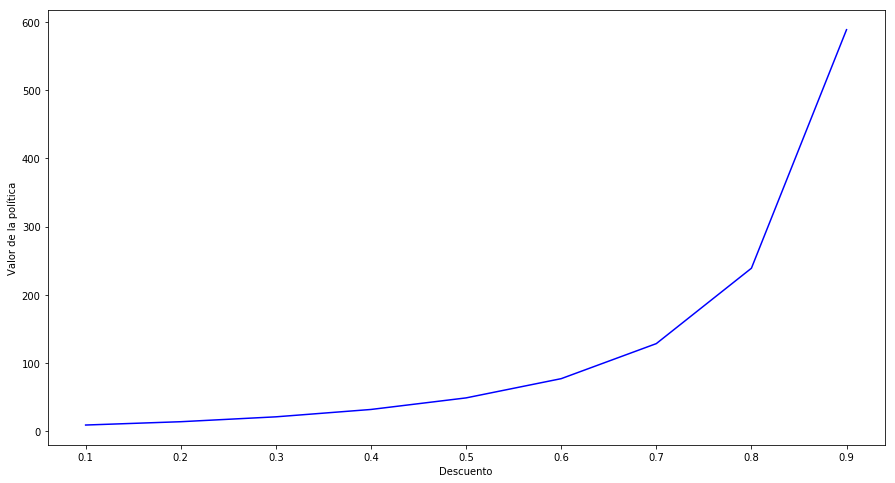

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(descuentos, valores_pi_grafica, 'b-')
plt.xticks(descuentos)
plt.xlabel('Descuento')
plt.ylabel('Valor de la política')
plt.show()

### 4) Implementación de los ejercicios anteriores empleando Iteración de Política.

#### 4.1 Ejercicio número 1

In [18]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

#Iteración de Política  
actualizaciones = 0
evolucion = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    pi = []
    for i in range(0, WORLD_SIZE):
        pi.append([])
        for j in range(0, WORLD_SIZE):
            pi[i].append([])
            max_v = -3000
            for action in actions:
                newPosition = nextState[i][j][action]
                v = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])   
                if v >= max_v:
                    max_v = v
            cant_actions = 0
            for action in actions:
                newPosition = nextState[i][j][action]
                v = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                if v == max_v:
                    pi[i][j].append(action)
                    newWorld[i, j] = v
                    cant_actions += 1
            for action in actions:
                if action in pi[i][j]:
                    actionProb[i][j][action] = 1/cant_actions
                else:
                    actionProb[i][j][action] = 0
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    actualizaciones += 1
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Óptima')
        print(np.array(pi))
        break
    world = newWorld

Política Óptima
[[list(['R']) list(['L', 'U', 'R', 'D']) list(['L'])
  list(['L', 'U', 'R', 'D']) list(['L'])]
 [list(['U']) list(['U']) list(['U']) list(['U']) list(['U'])]
 [list(['U']) list(['U']) list(['U']) list(['U']) list(['U'])]
 [list(['U']) list(['U']) list(['U']) list(['U']) list(['U'])]
 [list(['U']) list(['U']) list(['U']) list(['U']) list(['U'])]]


##### Gráfica

Se logra la convergencia en la iteración k=32


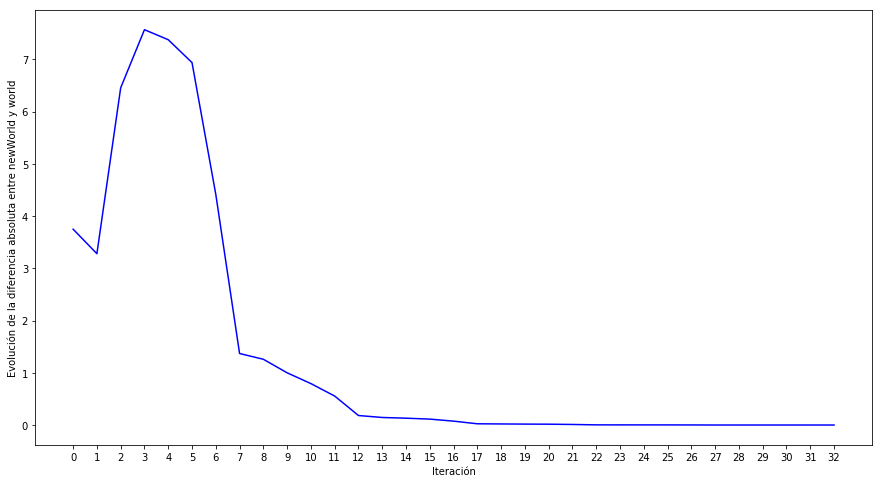

In [19]:
import matplotlib.pyplot as plt
print('Se logra la convergencia en la iteración k={}'.format(np.argmin(evolucion)))
plt.figure(figsize=(15, 8))
plt.plot(range(0, actualizaciones), evolucion, 'b-')
plt.xticks(range(0, actualizaciones))
plt.xlabel('Iteración')
plt.ylabel('Evolución de la diferencia absoluta entre newWorld y world')
plt.show()

#### 4.2 Ejercicio número 2

In [20]:
import numpy as np

# Estados
HIGH = 0
LOW = 1

# Acciones
SEARCH = 0
WAIT = 1
RECHARGE = 2

states = [HIGH, LOW]
actions = [SEARCH, WAIT, RECHARGE]
N_STATES = len(states)
N_ACTIONS = len(actions)
P = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # Probabilidades de Transición
R = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # Rewards


alfa = 0.70
beta = 0.30
r_search = 10
r_wait = 5

# ( s  ,  a   , s')
P[HIGH,SEARCH,HIGH] = alfa
P[HIGH,SEARCH,LOW] = 1 - alfa
P[LOW,SEARCH,HIGH] = 1 - beta
P[LOW,SEARCH,LOW] = beta
P[HIGH,WAIT,HIGH] = 1.0
P[HIGH,WAIT,LOW] = 0.0
P[LOW,WAIT,HIGH] = 0.0
P[LOW,WAIT,LOW] = 1.0
P[LOW,RECHARGE,HIGH] = 1.0
P[LOW,RECHARGE,LOW] = 0.0

# ( s  ,  a   , s')
R[HIGH,SEARCH,HIGH] = r_search
R[HIGH,SEARCH,LOW] = r_search
R[LOW,SEARCH,HIGH] = -3
R[LOW,SEARCH,LOW] = r_search
R[HIGH,WAIT,HIGH] = r_wait
R[HIGH,WAIT,LOW] = r_wait
R[LOW,WAIT,HIGH] = r_wait
R[LOW,WAIT,LOW] = r_wait
R[LOW,RECHARGE,HIGH] = 0
R[LOW,RECHARGE,LOW] = 0

# factor de descuento
gamma = 0.9

# inicializa la política y la función de valor
policy = [0 for s in range(N_STATES)]
V = np.zeros(N_STATES)

print("Política Inicial")
print(policy)

is_value_changed = True
iterations = 0
while is_value_changed:
    is_value_changed = False
    iterations += 1
    # corre la iteración de valor para cada estado 
    for s in range(N_STATES):
        V[s] = sum([P[s,policy[s],s1] * (R[s,policy[s],s1] + gamma*V[s1]) for s1 in range(N_STATES)])
        
    # realiza la mejora de la política
    for s in range(N_STATES):
        q_best = V[s]
        for a in range(N_ACTIONS):
            q_sa = sum([P[s, a, s1] * (R[s, a, s1] + gamma * V[s1]) for s1 in range(N_STATES)])
            if q_sa > q_best:
                print("State", s, ": q_sa", q_sa, "q_best", q_best)
                policy[s] = a
                q_best = q_sa
                is_value_changed = True

    print ("Iteracion:", iterations)

print ("Política Final")
print (policy)
print (V)

Política Inicial
[0, 0]
State 0 : q_sa 18.244 q_best 10.0
State 1 : q_sa 9.144 q_best 7.2
State 1 : q_sa 11.48 q_best 9.144
Iteracion: 1
State 0 : q_sa 24.59332 q_best 18.244
State 1 : q_sa 15.49332 q_best 11.48
State 1 : q_sa 16.4196 q_best 15.49332
Iteracion: 2
State 0 : q_sa 31.46996836 q_best 24.59332
State 1 : q_sa 22.36996836 q_best 22.133988
State 1 : q_sa 24.9205892 q_best 22.36996836
Iteracion: 3
State 0 : q_sa 36.5546391508 q_best 31.46996836
State 1 : q_sa 27.4546391508 q_best 24.9205892
State 1 : q_sa 28.322971524 q_best 27.4546391508
Iteracion: 4
State 0 : q_sa 41.9121999786 q_best 36.5546391508
State 1 : q_sa 34.6092577121 q_best 32.8991752357
Iteracion: 5
State 0 : q_sa 45.7491855688 q_best 41.9121999786
State 1 : q_sa 36.6491855688 q_best 34.6092577121
State 1 : q_sa 37.7209799808 q_best 36.6491855688
Iteracion: 6
State 0 : q_sa 49.9390390016 q_best 45.7491855688
State 1 : q_sa 42.0568403108 q_best 41.1742670119
Iteracion: 7
State 0 : q_sa 52.8169414549 q_best 49.939039

#### 4.3 Ejercicio número 3

In [21]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
S_POS = [0, 0]
G_POS = [3, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se obtiene la función de transición y la función de reward
actionReward, nextState = reward_nexstate()

#Iteración de Política  
actualizaciones = 0
evolucion = []
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    pi = []
    for i in range(0, WORLD_SIZE):
        pi.append([])
        for j in range(0, WORLD_SIZE):
            pi[i].append([])
            max_v = -3000
            for action in actions:
                newPosition = nextState[i][j][action]
                # Actualización basada en Bellman 
                v = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])   
                if v >= max_v:
                    max_v = v
            cant_actions = 0
            for action in actions:
                newPosition = nextState[i][j][action]
                v = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                if v == max_v:
                    pi[i][j].append(action)
                    newWorld[i, j] = v
                    cant_actions += 1
            for action in actions:
                if action in pi[i][j]:
                    actionProb[i][j][action] = 1/cant_actions
                else:
                    actionProb[i][j][action] = 0
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    actualizaciones += 1
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Óptima')
        print(np.array(pi))
        break
    world = newWorld

Política Óptima
[[list(['R', 'D']) list(['D']) list(['R', 'D']) list(['D'])]
 [list(['R']) list(['R', 'D']) list(['R']) list(['D'])]
 [list(['R', 'D']) list(['D']) list(['R', 'D']) list(['D'])]
 [list(['R']) list(['R']) list(['R']) list(['L', 'U'])]]


##### Gráfica

Se logra la convergencia en la iteración k=32


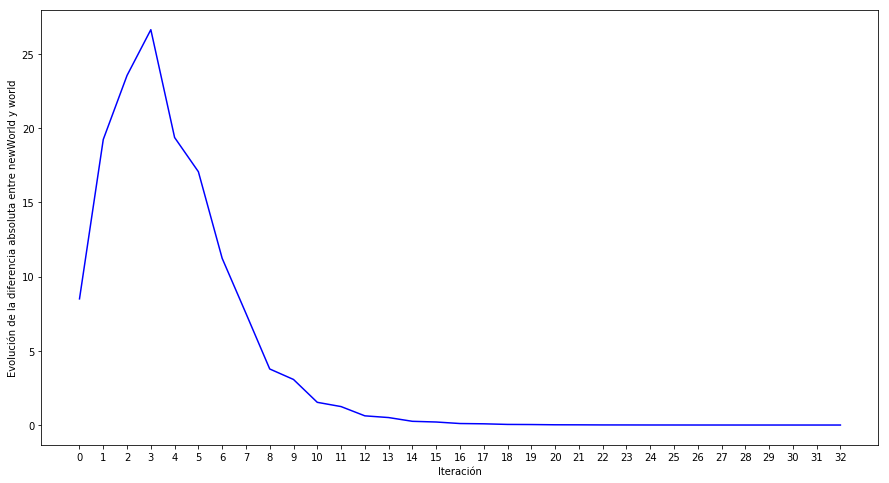

In [22]:
import matplotlib.pyplot as plt
print('Se logra la convergencia en la iteración k={}'.format(np.argmin(evolucion)))
plt.figure(figsize=(15, 8))
plt.plot(range(0, actualizaciones), evolucion, 'b-')
plt.xticks(range(0, actualizaciones))
plt.xlabel('Iteración')
plt.ylabel('Evolución de la diferencia absoluta entre newWorld y world')
plt.show()

FIN